In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx


In [5]:
def qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos):
    num_qubits = len(qubit_list)
    qubits_per_node = num_qubits//num_nodes
    delta = 0.12
    for i_n in range(num_nodes):
        plt.fill_between([gate_pos-step,gate_final_pos],[(i_n-delta)*qubits_per_node,(i_n-delta)*qubits_per_node],[(i_n+1+delta)*qubits_per_node-1,(i_n+1+delta)*qubits_per_node-1],color="gainsboro")

    for i_q, qubit in enumerate(qubit_list):
        if i_q % 2 ==0:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],"k")
        else:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],color="gray")
        plt.text(-3,i_q, qubit, fontsize=6)

def circuit_plot(gate_pos,gate_seq,xmax=0):
    # gate_pos = 0
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    for gate in gate_seq:
        g0 = int(gate[0].split(",")[-1])+ int(gate[0].split(",")[0])* qubits_per_node
        g1 = int(gate[1].split(",")[-1])+ int(gate[1].split(",")[0])* qubits_per_node
        plt.plot([gate_pos,gate_pos],[g0,g1],"k-")
        plt.plot(gate_pos,g0,"ko-",markersize=2.5)
        plt.plot([gate_pos],[g1],"ko-",markersize=6,markerfacecolor="white")
        plt.plot([gate_pos],[g1],"k+",markersize=6,markerfacecolor="white")
        gate_pos += step
    if xmax > 0 :
        plt.xlim([-3,xmax])

    # plt.axis("off")
    # plt.show()
        

In [ ]:
node_list = range(4)
qubits_per_node = 2
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node

# Q = nx.Graph()
# Q.add_nodes_from(node_list)

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

gate_seq = []
for target in range(num_qubits-1,0,-1):
    for control in range(target-1,-1,-1):
        gate_seq.append((qubit_list[control],qubit_list[target]))

num_gates = len(gate_seq)
gate_pos = 0
step = 1
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

Include internal gates and remove them

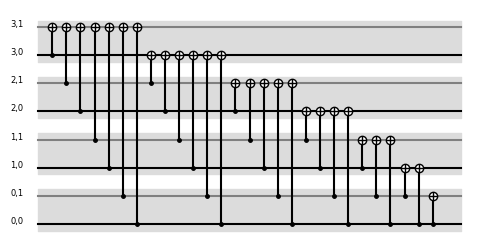

[[('3,0', '3,1')], [('2,1', '3,1')], [('2,0', '3,1'), ('2,1', '3,0')], [('1,1', '3,1'), ('2,0', '3,0')], [('1,0', '3,1'), ('1,1', '3,0'), ('2,0', '2,1')], [('0,1', '3,1'), ('1,0', '3,0'), ('1,1', '2,1')], [('0,0', '3,1'), ('0,1', '3,0'), ('1,0', '2,1'), ('1,1', '2,0')], [('0,0', '3,0'), ('0,1', '2,1'), ('1,0', '2,0')], [('0,0', '2,1'), ('0,1', '2,0'), ('1,0', '1,1')], [('0,0', '2,0'), ('0,1', '1,1')], [('0,0', '1,1'), ('0,1', '1,0')], [('0,0', '1,0')], [('0,0', '0,1')]]
[{('3,0', '3,1'): 1}, {('2,1', '3,1'): 1}, {('2,0', '3,1'): 1, ('2,1', '3,0'): 1}, {('1,1', '3,1'): 1, ('2,0', '3,0'): 1}, {('1,0', '3,1'): 1, ('1,1', '3,0'): 1, ('2,0', '2,1'): 1}, {('0,1', '3,1'): 1, ('1,0', '3,0'): 1, ('1,1', '2,1'): 1}, {('0,0', '3,1'): 1, ('0,1', '3,0'): 1, ('1,0', '2,1'): 1, ('1,1', '2,0'): 1}, {('0,0', '3,0'): 1, ('0,1', '2,1'): 1, ('1,0', '2,0'): 1}, {('0,0', '2,1'): 1, ('0,1', '2,0'): 1, ('1,0', '1,1'): 1}, {('0,0', '2,0'): 1, ('0,1', '1,1'): 1}, {('0,0', '1,1'): 1, ('0,1', '1,0'): 1}, {('0,0',

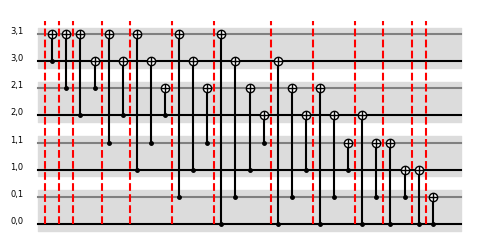

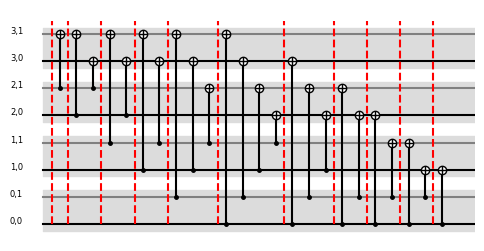

In [10]:
node_list = range(4)
qubits_per_node = 2
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

gate_seq = []
for target in range(num_qubits-1,0,-1):
    for control in range(target-1,-1,-1):
        gate_seq.append((qubit_list[control],qubit_list[target]))

num_gates = len(gate_seq)

Q = nx.Graph()
Q.add_nodes_from(qubit_list)

gate_pos = 0
step = 1
plt.figure(figsize=(6,3))
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

gate_seq_iter = gate_seq.copy()

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(qubit_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
print(gate_mul_seq)
# # # Q.add_edges_from(gate_seq)

gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)

for query in query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()

remote_query_seq = []
for query in query_seq:
    remote_query = []
    # print(query)
    for gate in query:
        if gate[0].split(",")[0] != gate[1].split(",")[0]:
            remote_query.append(gate)
    if len(remote_query)>0:
        remote_query_seq.append(remote_query)


gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
for query in remote_query_seq:
    circuit_plot(gate_pos,query,xmax=gate_final_pos-4)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()


In [3]:
def parallel_qft_circuit_gen(node_qubit_list):
    # num_nodes = len(node_list)
    # qubit_list = range(qubits_per_node)

    num_qubits = len(node_qubit_list)

    gate_seq = []
    for target in range(num_qubits-1,0,-1):
        for control in range(target-1,-1,-1):
            gate_seq.append((node_qubit_list[control],node_qubit_list[target]))

    num_gates = len(gate_seq)

    Q = nx.Graph()
    Q.add_nodes_from(node_qubit_list)

    # gate_pos = 0
    # step = 1
    # plt.figure(figsize=(6,3))
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    # qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
    # circuit_plot(gate_pos,gate_seq)
    # plt.axis("off")
    # plt.show()

    gate_seq_iter = gate_seq.copy()

    query_seq = []
    query = []
    gate_mul = {}
    gate_mul_seq = []
    while len(gate_seq_iter)>0:
        # print(gate_seq_iter)
        inds_keep = []
        not_block_gate = True
        for i_g, gate_nodes in enumerate(gate_seq_iter):
            if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
                if gate_nodes in query and not_block_gate:
                    gate_mul[gate_nodes] += 1
                    # query.append(gate_nodes)
                else:
                    Q.add_edge(gate_nodes[0],gate_nodes[1])
                    inds_keep.append(i_g)
                    not_block_gate = False
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                query.append(gate_nodes)
                gate_mul[gate_nodes] =  1
                not_block_gate = True

        query_seq.append(query)
        gate_mul_seq.append(gate_mul)
        query = []
        gate_mul = {}
        Q = nx.Graph()
        Q.add_nodes_from(node_qubit_list)
        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

    print(query_seq)
    print(gate_mul_seq)
    # # # Q.add_edges_from(gate_seq)

    # gate_pos = 0
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    # plt.figure(figsize=(6,3))
    # qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)

    # for query in query_seq:
    #     circuit_plot(gate_pos,query)
    #     plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    #     gate_pos += step*len(query)

    # plt.axis("off")
    # plt.show()

    remote_query_seq = []
    remote_gate_mul_seq = []
    for i_q, query in enumerate(query_seq):
        remote_query = []
        remote_gate_mul = {}
        # print(query)
        for gate in query:
            if gate[0].split(",")[0] != gate[1].split(",")[0]:
                remote_query.append(gate)
                remote_gate_mul[gate] = gate_mul_seq[i_q][gate]
        if len(remote_query)>0:
            remote_query_seq.append(remote_query)
            remote_gate_mul_seq.append(remote_gate_mul)

    # gate_pos = 0
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    # plt.figure(figsize=(6,3))
    # qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
    # for query in remote_query_seq:
    #     circuit_plot(gate_pos,query,xmax=gate_final_pos-0)
    #     plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    #     gate_pos += step*len(query)

    # plt.axis("off")
    # plt.show()
    
    return remote_query_seq, remote_gate_mul_seq

# Clos

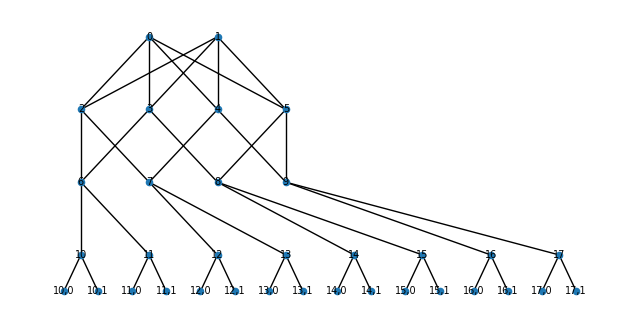

In [9]:
n = 4 # starts from 4
bandwidth = 2
num_bsm = 2
num_ToR = 2
num_qubits_per_node = 2
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

if n==4:
    conn_right = [7]
    conn_left = [8]
elif n==6:
    conn_right = [11,14]
    conn_left = [12,15]
elif n==8:
    conn_right = [15,19,23]
    conn_left = [16,20,24]

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
node_qubit_list = []
for node in node_list:
    for qubit in range(num_qubits_per_node):
        qname = f"{node},{qubit}"
        node_qubit_list.append(qname)
        G.add_edge(node,qname, weight=1)
        
# G.add_nodes_from(node_qubit_list, type='qubit')
for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    if edge in conn_left:
        extra_edges.append((edge,agg_switches[i1]))
        new_edges.append((edge,agg_switches[i1-1]))
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 
    if edge in conn_right:
        extra_edges.append((edge,agg_switches[i1+1]))
        new_edges.append((edge,agg_switches[i1+2]))

G.remove_edges_from(extra_edges)
G.add_edges_from(new_edges, weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 0
shift_node = 1
pos_core = {i: (shift+i+ n/4 ,2) for i in core_switches}
pos_agg = {i: (shift+(i-n//2)% n,1) for i in agg_switches}
pos_edge = {i: (shift+i-7*n/4+1,0) for i in edge_switches}
pos_nodes = {node: (i,-1) for i, node in enumerate(node_list)}
pos_qs = {q: (i/2-1/4,-1.5) for i, q in enumerate(node_qubit_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes | pos_qs


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

In [ ]:
query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list)
print(query_seq)

# fat tree

In [ ]:
n = 4 # starts from 4
bandwidth = 4
num_bsm = 1
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes

core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth
num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')


for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % 2 ==0 and i_a % 2 ==0:
            G.add_edge(core,agg, weight=core_bw)
        if i_c % 2 ==1 and i_a % 2 ==1:
            G.add_edge(core,agg, weight=core_bw)

for i_a, agg in enumerate(agg_switches):
    G.add_edge(agg,edge_switches[i_a], weight=agg_bw)
    if i_a % 2 == 0:
        G.add_edge(agg,edge_switches[i_a+1], weight=agg_bw)
    else:
        G.add_edge(agg,edge_switches[i_a-1], weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j], weight=edge_bw)
    

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


[[('17,0', '17,1')], [('16,1', '17,1')], [('16,0', '17,1'), ('16,1', '17,0')], [('15,1', '17,1'), ('16,0', '17,0')], [('15,0', '17,1'), ('15,1', '17,0'), ('16,0', '16,1')], [('14,1', '17,1'), ('15,0', '17,0'), ('15,1', '16,1')], [('14,0', '17,1'), ('14,1', '17,0'), ('15,0', '16,1'), ('15,1', '16,0')], [('13,1', '17,1'), ('14,0', '17,0'), ('14,1', '16,1'), ('15,0', '16,0')], [('13,0', '17,1'), ('13,1', '17,0'), ('14,0', '16,1'), ('14,1', '16,0'), ('15,0', '15,1')], [('12,1', '17,1'), ('13,0', '17,0'), ('13,1', '16,1'), ('14,0', '16,0'), ('14,1', '15,1')], [('12,0', '17,1'), ('12,1', '17,0'), ('13,0', '16,1'), ('13,1', '16,0'), ('14,0', '15,1'), ('14,1', '15,0')], [('11,1', '17,1'), ('12,0', '17,0'), ('12,1', '16,1'), ('13,0', '16,0'), ('13,1', '15,1'), ('14,0', '15,0')], [('11,0', '17,1'), ('11,1', '17,0'), ('12,0', '16,1'), ('12,1', '16,0'), ('13,0', '15,1'), ('13,1', '15,0'), ('14,0', '14,1')], [('10,1', '17,1'), ('11,0', '17,0'), ('11,1', '16,1'), ('12,0', '16,0'), ('12,1', '15,1'), 

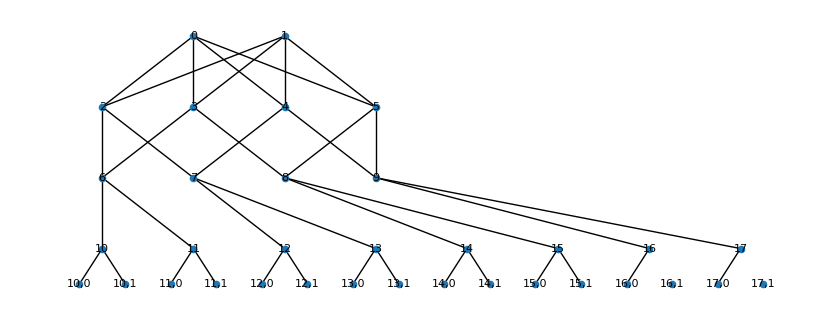

num seq: 1 , num switch: 1 , [1]


In [10]:
def plotter(G_ins,bsm_stat):
    print(bsm_stat)
    plt.figure(figsize=(8,3))
    nx.draw(G_ins, pos, node_size=20, font_size=8, with_labels=True)
    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

# query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_list, num_qubits_per_node)
query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list)

# for i_q, gate_seq in enumerate(query_seq):
for i_q in [0]:
    gate_seq = query_seq[i_q]

    gate_seq_iter = gate_seq[:]
    gate_mul_seq_iter = gate_mul_seq[i_q]
    print("gate seq:", gate_seq)
    # print("num links:", num_links)

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.ones(num_edge,dtype=np.int16)* num_bsm
        G_ins =  G.copy()

        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            print(g, gate_mul_seq_iter[g])

            for link in range(gate_mul_seq_iter[g]):
                # n0 = int(g[0].split(",")[0])
                # n1 = int(g[1].split(",")[0])
                n0 = g[0]
                n1 = g[1]
                if nx.has_path(G_ins,n0,n1):
                    shortestpath = nx.shortest_path(G_ins,n0,n1,weight=None)
                    
                    sp = []
                    for i in range(0,len(shortestpath)-1):
                        sp.append((shortestpath[i],shortestpath[i+1]))
                    
                    b = []
                    for i, edge in enumerate(edge_switches):
                        if edge in shortestpath:
                            b.append(i)

                    
                    if len(b)>1:
                        if bsm_stat[b[0]] > 0 and bsm_stat[b[1]] > 0:
                            bsm_stat[random.sample(b,1)] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        elif bsm_stat[b[0]] > 0:
                            bsm_stat[b[0]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)
        
                        elif bsm_stat[b[1]] > 0:
                            bsm_stat[b[1]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        else:
                            inds_keep.append(i_g)
                            gate_mul_seq_iter[g] -= link
                            break

                    elif bsm_stat[b] > 0:
                        bsm_stat[b] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                        plotter(G_ins,bsm_stat)        
                    else:
                        inds_keep.append(i_g)
                        gate_mul_seq_iter[g] -= link
                        break
                    #     assert 0
                    # # # print(bsm_stat)
                    # print(bsm_stat)
                    # plt.figure(figsize=(8,3))
                    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                    # # nx.draw(G,  with_labels=True, node_color = color_list)
                    # plt.show()
                else:
                    inds_keep.append(i_g)
                    gate_mul_seq_iter[g] -= link
                    break

        switch_time.append(np.array(num_bsm-bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]
        gate_mul_seq_iter = {g:gate_mul_seq_iter[g] for g in gate_seq_iter}

    print("num seq:", len(gate_seq), ", num switch:", len(switch_time), ",",switch_time)

In [12]:
def plotter(G_ins,bsm_stat):
    print(bsm_stat)
    plt.figure(figsize=(8,3))
    nx.draw(G_ins, pos, node_size=20, font_size=8, with_labels=True)
    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

# query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_list, num_qubits_per_node)
query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list)

for i_q, gate_seq in enumerate(query_seq):
# for i_q in [0]:
    # gate_seq = query_seq[i_q]

    gate_seq_iter = gate_seq[:]
    gate_mul_seq_iter = gate_mul_seq[i_q]
    # print("gate seq:", gate_seq)
    # print("num links:", num_links)

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.ones(num_edge,dtype=np.int16)* num_bsm
        G_ins =  G.copy()

        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            # print(g, gate_mul_seq_iter[g])

            for link in range(gate_mul_seq_iter[g]):
                # n0 = int(g[0].split(",")[0])
                # n1 = int(g[1].split(",")[0])
                n0 = g[0]
                n1 = g[1]
                if nx.has_path(G_ins,n0,n1):
                    shortestpath = nx.shortest_path(G_ins,n0,n1,weight=None)
                    
                    sp = []
                    for i in range(0,len(shortestpath)-1):
                        sp.append((shortestpath[i],shortestpath[i+1]))
                    
                    b = []
                    for i, edge in enumerate(edge_switches):
                        if edge in shortestpath:
                            b.append(i)

                    
                    if len(b)>1:
                        if bsm_stat[b[0]] > 0 and bsm_stat[b[1]] > 0:
                            bsm_stat[random.sample(b,1)] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            # plotter(G_ins,bsm_stat)

                        elif bsm_stat[b[0]] > 0:
                            bsm_stat[b[0]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            # plotter(G_ins,bsm_stat)
        
                        elif bsm_stat[b[1]] > 0:
                            bsm_stat[b[1]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            # plotter(G_ins,bsm_stat)

                        else:
                            inds_keep.append(i_g)
                            gate_mul_seq_iter[g] -= link
                            break

                    elif bsm_stat[b] > 0:
                        bsm_stat[b] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                        # plotter(G_ins,bsm_stat)        
                    else:
                        inds_keep.append(i_g)
                        gate_mul_seq_iter[g] -= link
                        break
                    #     assert 0
                    # # # print(bsm_stat)
                    # print(bsm_stat)
                    # plt.figure(figsize=(8,3))
                    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                    # # nx.draw(G,  with_labels=True, node_color = color_list)
                    # plt.show()
                else:
                    inds_keep.append(i_g)
                    gate_mul_seq_iter[g] -= link
                    break

        switch_time.append(np.array(num_bsm-bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]
        gate_mul_seq_iter = {g:gate_mul_seq_iter[g] for g in gate_seq_iter}

    print("num seq:", len(gate_seq), ", num switch:", len(switch_time), ",",switch_time)

[[('17,0', '17,1')], [('16,1', '17,1')], [('16,0', '17,1'), ('16,1', '17,0')], [('15,1', '17,1'), ('16,0', '17,0')], [('15,0', '17,1'), ('15,1', '17,0'), ('16,0', '16,1')], [('14,1', '17,1'), ('15,0', '17,0'), ('15,1', '16,1')], [('14,0', '17,1'), ('14,1', '17,0'), ('15,0', '16,1'), ('15,1', '16,0')], [('13,1', '17,1'), ('14,0', '17,0'), ('14,1', '16,1'), ('15,0', '16,0')], [('13,0', '17,1'), ('13,1', '17,0'), ('14,0', '16,1'), ('14,1', '16,0'), ('15,0', '15,1')], [('12,1', '17,1'), ('13,0', '17,0'), ('13,1', '16,1'), ('14,0', '16,0'), ('14,1', '15,1')], [('12,0', '17,1'), ('12,1', '17,0'), ('13,0', '16,1'), ('13,1', '16,0'), ('14,0', '15,1'), ('14,1', '15,0')], [('11,1', '17,1'), ('12,0', '17,0'), ('12,1', '16,1'), ('13,0', '16,0'), ('13,1', '15,1'), ('14,0', '15,0')], [('11,0', '17,1'), ('11,1', '17,0'), ('12,0', '16,1'), ('12,1', '16,0'), ('13,0', '15,1'), ('13,1', '15,0'), ('14,0', '14,1')], [('10,1', '17,1'), ('11,0', '17,0'), ('11,1', '16,1'), ('12,0', '16,0'), ('12,1', '15,1'), 

In [2]:
from network_utils import *
import random
import numpy as np
import matplotlib.pyplot as plt

n = 8 # starts from 4
bandwidth = 2
num_bsm = 2
num_ToR_list = range(2,11,2)
num_qubits_per_node = 8

gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec


# problem_size_list = range(10,len(node_qubit_list),30)
problem_size_list = range(16,101,16)
T_list= np.zeros((len(num_ToR_list),len(problem_size_list)))

for i_tor, num_ToR in enumerate(num_ToR_list):
    G, vertex_list = clos_multiqubit(n, num_ToR, num_qubits_per_node, bandwidth)
    core_switches, agg_switches, edge_switches, node_list, node_qubit_list = vertex_list
    print(len(node_qubit_list))
    for i_p, problem_size in enumerate(problem_size_list):
        # print(problem_size, end="\r")
        query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list[:problem_size])

        Tvals = network_latency_multiqubit_circuit(G, vertex_list, num_bsm, gen_rate, switch_duration, query_seq, gate_mul_seq, hyperx=False)
        T_list[i_tor,i_p] = np.sum(Tvals) + switch_duration * len(query_seq)
        # T_list ..append(T)

# print(T_list)

256
512
768
1024
1280


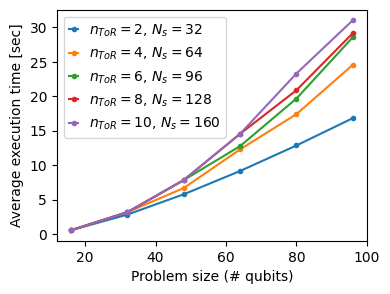

In [14]:
plt.figure(figsize=(4,3))
for i_tor, num_ToR in enumerate(num_ToR_list):
    plt.plot(problem_size_list,T_list[i_tor,:],".-", label=r"$n_{ToR}=$"+f"{num_ToR}"+r", $N_s=$"+f"{n**2/4*num_ToR:.0f}")

# plt.plot(problem_size_list,T_list,".-")
plt.legend(handlelength=.6)
plt.xlabel("Problem size (# qubits)")
plt.ylabel("Average execution time [sec]")
plt.show()

In [19]:
n = 8 # starts from 4
bandwidth = 2
num_bsm_list = [2,4,6,8]
num_ToR = 8
num_qubits_per_node = 8

gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

# problem_size_list = range(10,len(node_qubit_list),30)
problem_size_list = range(16,101,16)
T_list= np.zeros((len(num_bsm_list),len(problem_size_list)))

G, vertex_list = clos_multiqubit(n, num_ToR, num_qubits_per_node, bandwidth)
core_switches, agg_switches, edge_switches, node_list, node_qubit_list = vertex_list
print(len(node_qubit_list))

for i_p, problem_size in enumerate(problem_size_list):
    # print(problem_size, end="\r")
    query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list[:problem_size])
    for i_b, num_bsm in enumerate(num_bsm_list):

        Tvals = network_latency_multiqubit_circuit(G, vertex_list, num_bsm, gen_rate, switch_duration, query_seq, gate_mul_seq, hyperx=False)
        T_list[i_b,i_p] = np.sum(Tvals) + switch_duration * len(query_seq)
        # T_list ..append(T)

# print(T_list)

1024


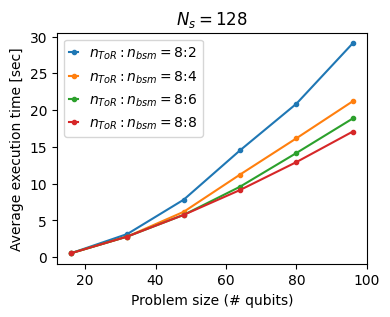

In [25]:
plt.figure(figsize=(4,3))
for i_b, num_bsm in enumerate(num_bsm_list):
    plt.plot(problem_size_list,T_list[i_b,:],".-", label=r"$n_{ToR}:n_{bsm}=$"+f"{num_ToR}:{num_bsm}")

plt.title(r"$N_s=$"+f"{n**2/4*num_ToR:.0f}")
# plt.plot(problem_size_list,T_list,".-")
plt.legend(handlelength=.6)
plt.xlabel("Problem size (# qubits)")
plt.ylabel("Average execution time [sec]")
plt.show()

In [41]:
n = 8 # starts from 4
bandwidth_list = [1,2,3,4,5]
num_bsm = 4
num_ToR = 8
num_qubits_per_node = 8

gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

# problem_size_list = range(10,len(node_qubit_list),30)
problem_size_list = range(16,101,16)
T_list= np.zeros((len(bandwidth_list),len(problem_size_list)))

for i_b, bandwidth in enumerate(bandwidth_list):
    G, vertex_list = clos_multiqubit(n, num_ToR, num_qubits_per_node, bandwidth)
    core_switches, agg_switches, edge_switches, node_list, node_qubit_list = vertex_list
    print(len(node_qubit_list))
    for i_p, problem_size in enumerate(problem_size_list):
        # print(problem_size, end="\r")
        query_seq, gate_mul_seq = parallel_qft_circuit_gen(node_qubit_list[:problem_size])

        Tvals = network_latency_multiqubit_circuit(G, vertex_list, num_bsm, gen_rate, switch_duration, query_seq, gate_mul_seq, hyperx=False)
        T_list[i_b,i_p] = np.sum(Tvals) + switch_duration * len(query_seq)



1024


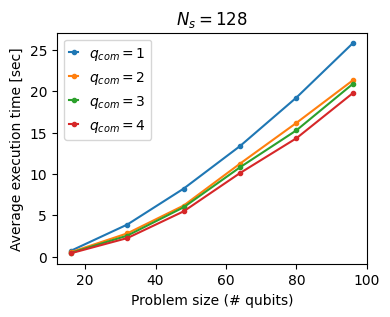

In [ ]:
plt.figure(figsize=(4,3))
for i_b, bandwidth in enumerate(bandwidth_list):
    plt.plot(problem_size_list,T_list[i_b,:],".-", label=r"$q_{com}=$"+f"{bandwidth}")

plt.title(r"$N_s=$"+f"{n**2/4*num_ToR:.0f}")
# plt.plot(problem_size_list,T_list,".-")
plt.legend(handlelength=.6)
plt.xlabel("Problem size (# qubits)")
plt.ylabel("Average execution time [sec]")
plt.show()

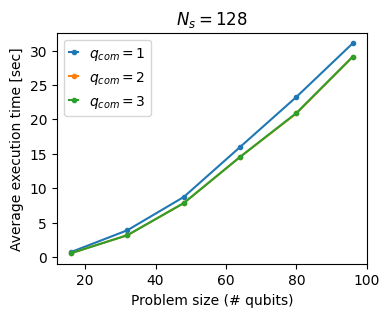

In [30]:
plt.figure(figsize=(4,3))
for i_b, bandwidth in enumerate(bandwidth_list):
    plt.plot(problem_size_list,T_list[i_b,:],".-", label=r"$q_{com}=$"+f"{bandwidth}")

plt.title(r"$N_s=$"+f"{n**2/4*num_ToR:.0f}")
# plt.plot(problem_size_list,T_list,".-")
plt.legend(handlelength=.6)
plt.xlabel("Problem size (# qubits)")
plt.ylabel("Average execution time [sec]")
plt.show()